In [3]:
%matplotlib inline
import sys
print('Python Version: {}'.format(sys.version))

import pandas as pd
print('pandas version: {}'.format(pd.__version__))

import matplotlib
print('matplotlib version: {}'.format(matplotlib.__version__))

import numpy as np
print('numpy version: {}'.format(np.__version__))

import scipy as sp
print('scipy version: {}'.format(sp.__version__))

import IPython
print('ipython version: {}'.format(IPython.__version__))

import sklearn
print('scikit-learn version: {}'.format(sklearn.__version__))

import matplotlib.pyplot as plt

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rcParams["font.family"] = 'AppleGothic'

import mglearn

from IPython.display import display

Python Version: 3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.3
matplotlib version: 2.0.2
numpy version: 1.13.1
scipy version: 0.19.1
ipython version: 6.0.0
scikit-learn version: 0.18.2


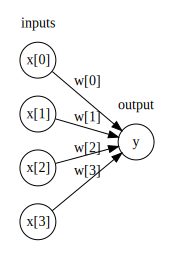

In [4]:
display(mglearn.plots.plot_logistic_regression_graph())

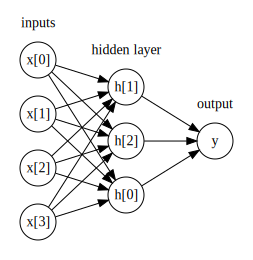

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

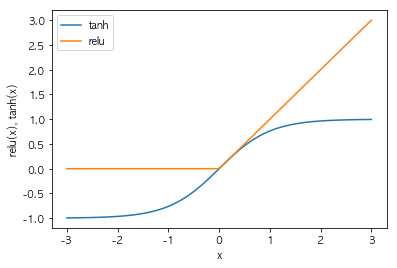

In [6]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

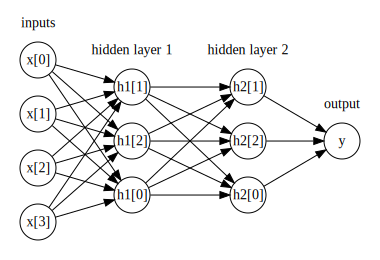

In [8]:
mglearn.plots.plot_two_hidden_layer_graph()

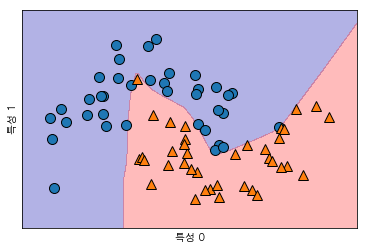

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

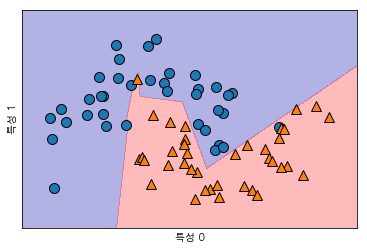

In [11]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

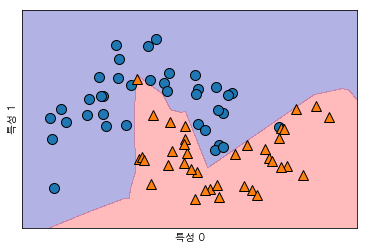

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

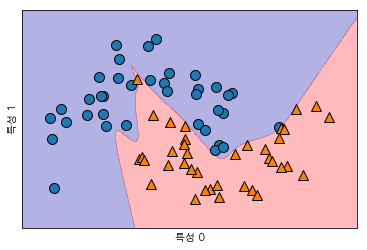

In [13]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

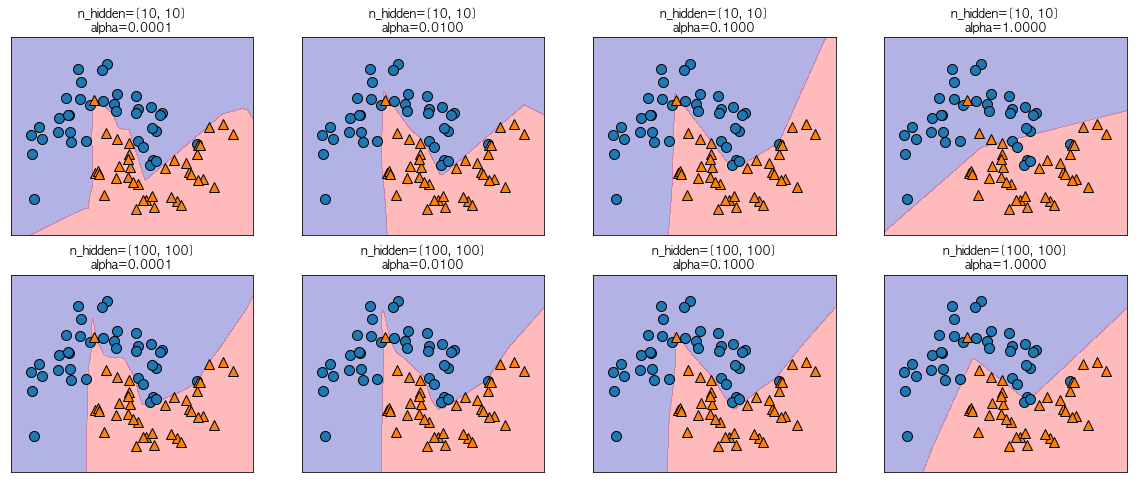

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha={:.4f}'.format(
            n_hidden_nodes, n_hidden_nodes, alpha
        ))

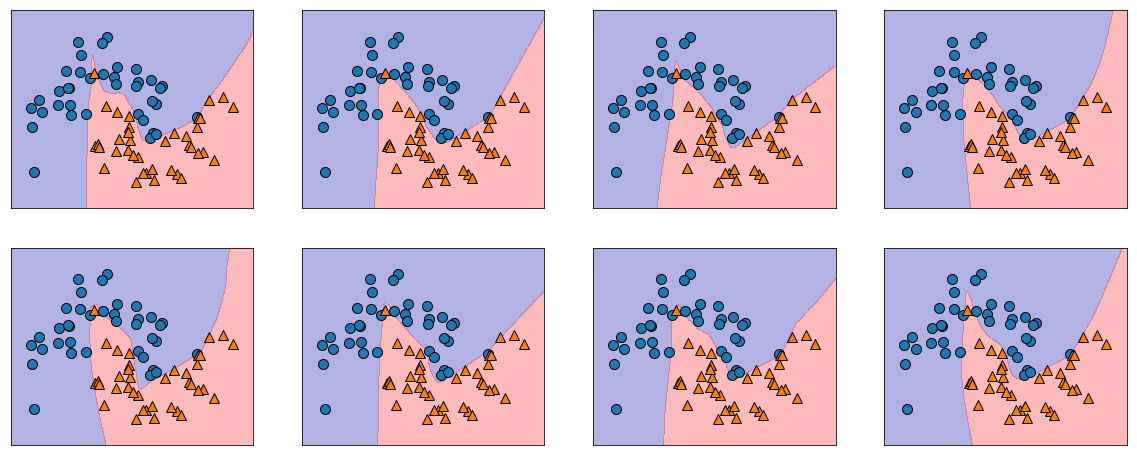

In [16]:
fix, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                       hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print('유방암 데이터의 특성별 최댓값:\n{}'.format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.906
테스트 세트 정확도: 0.881


In [21]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [23]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


In [24]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


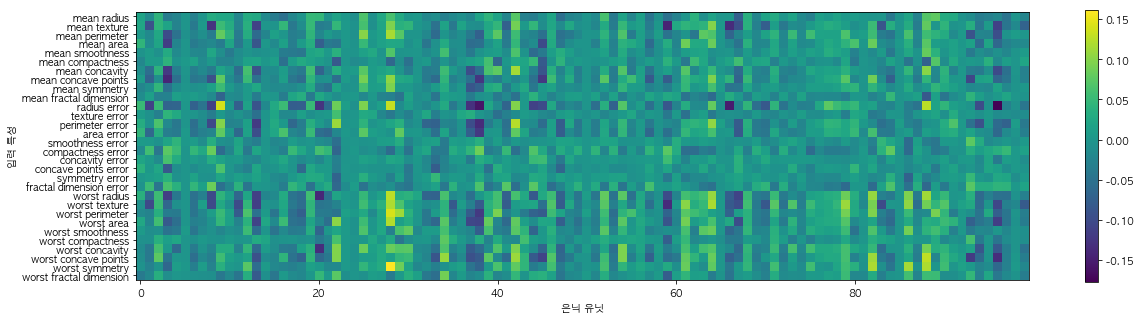

In [25]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()